## CIFAR10 Classification

#### Libraries

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam

### Visualizing the dataset

170508288/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)





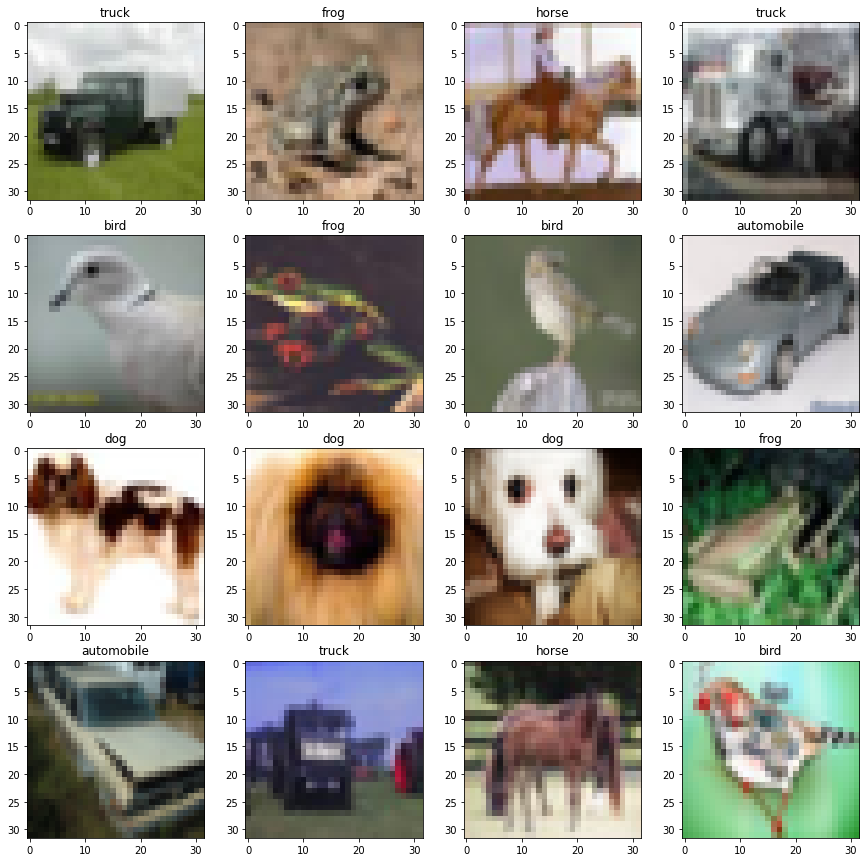

In [2]:
# load train and test 
(trainX, trainy), (testX, testy) = cifar10.load_data()
class_string = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
print('\n\n')

# plot some instance from dataset
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (15,15))

for i in range(4):
    for j in range(4):
        idx = np.random.randint(0, len(trainX))
        axs[i, j].imshow(trainX[idx])
        axs[i, j].title.set_text(str(class_string[trainy[idx][0]]))

plt.show()

## Load the Dataset with One hot encoding



In [3]:
def load_dataset():
    # load train and test 
    (trainX, trainy), (testX, testy) = cifar10.load_data()
    class_string = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # one hot encode target values
    trainY = to_categorical(trainy)
    testY = to_categorical(testy)

    return trainX, trainY, testX, testY

## Normalization

In [4]:
def normalize(train, test):
    # convert from integer to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    # normalize between 0 & 1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0

    return train_norm, test_norm

In [5]:
def summarize_result(history):
    # plot loss
    plt.figure(figsize=(10, 5))
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color = 'blue', label = 'train')
    plt.plot(history.history['val_loss'], color = 'orange', label = 'test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.figure(figsize=(10, 5))
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
    plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')
    plt.legend()
    plt.show()

# AlexNet

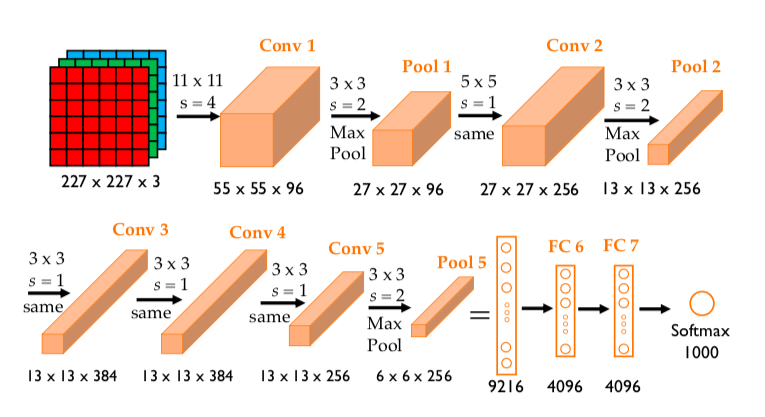

In [ ]:
def AlexNet_model(input_shape, num_classes):
    
    AlexNet = Sequential()

    # layer 1
    AlexNet.add(Conv2D(filters= 96, kernel_size= (3, 3), strides = (4, 4), input_shape = input_shape, activation = 'relu'))
    AlexNet.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

    # layer 2
    AlexNet.add(Conv2D(filters = 256, kernel_size= (5, 5), strides = (1, 1), padding = 'same', activation = 'relu'))
    AlexNet.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

    # layer 3
    AlexNet.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))

    # layer 4
    AlexNet.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))

    # layer 5
    AlexNet.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
    AlexNet.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

    # layer 6
    AlexNet.add(Flatten())
    AlexNet.add(Dense(4096))
    AlexNet.add(Dropout(0.4))

    # layer 7
    AlexNet.add(Dense(4096))
    AlexNet.add(Dropout(0.4))

    # layer 8
    AlexNet.add(Dense(num_classes, activation = 'softmax'))

    return AlexNet

#### Main Function

In [ ]:
def Run(epoch_num, batch_size, opt):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()

    # normalization
    trainX, testX = normalize(trainX, testX)

    # create Model
    model = AlexNet_model(input_shape = trainX[0].shape, num_classes = 10)
    #print(model.summary())

    # compile model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # fit model
    history = model.fit(trainX, trainY, epochs = epoch_num, batch_size = batch_size, validation_data = (testX, testY)) 

    # evaluate model
    _ , acc = model.evaluate(testX, testY, verbose = 0)
    print(f"Accuracy : {acc}")

    # plot results
    summarize_result(history= history)

### Run

Accuracy : 0.6169999837875366


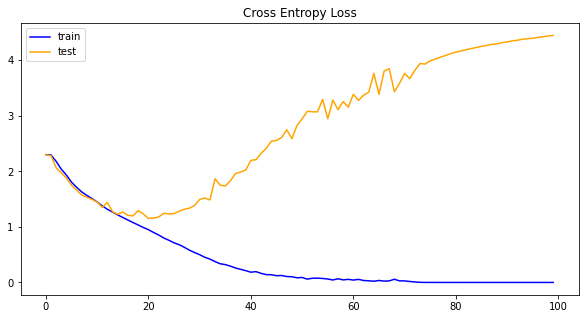

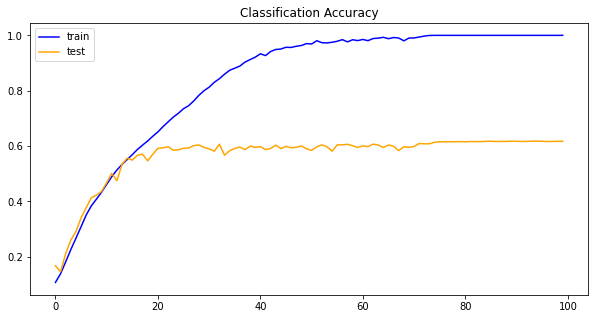

In [ ]:
# overfit 
optimizer = SGD(learning_rate = 0.001, momentum = 0.9)
Run(epoch_num = 100, batch_size = 64, opt = optimizer)

# Book Model

In [ ]:
def Book_model(input_shape, num_classes):
    
    model = Sequential()

    # layer 1
    model.add(Conv2D(filters= 6, kernel_size= (9, 9), strides = (1, 1), input_shape = input_shape, activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

    # layer 2
    model.add(Conv2D(filters = 12, kernel_size= (5, 5), strides = (1, 1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

    # layer 3
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))

    return model

In [ ]:
model = Book_model(trainX[0].shape, 10)

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 24, 24, 6)         1464      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 12)          1812      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 12)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [ ]:
optimizer = Adam(learning_rate = 0.001)
# compile model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainY, epochs = 50, batch_size = 64, validation_data = (testX, testY)) 

Epoch 1/50
782/782 [==============================] - 7s 7ms/step - loss: 1.9050 - accuracy: 0.3066 - val_loss: 1.7104 - val_accuracy: 0.3798
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 1.6422 - accuracy: 0.4085 - val_loss: 1.6003 - val_accuracy: 0.4191
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 1.5600 - accuracy: 0.4412 - val_loss: 1.5489 - val_accuracy: 0.4423
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 1.5115 - accuracy: 0.4597 - val_loss: 1.4931 - val_accuracy: 0.4620
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 1.4707 - accuracy: 0.4715 - val_loss: 1.4860 - val_accuracy: 0.4669
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 1.4414 - accuracy: 0.4852 - val_loss: 1.4379 - val_accuracy: 0.4849
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 1.4194 - accuracy: 0.4929 - val_loss: 1.4330 - val_accuracy: 0.4818
Epoch 

313/313 [==============================] - 1s 4ms/step - loss: 1.2642 - accuracy: 0.5527
Accuracy : 0.5526999831199646


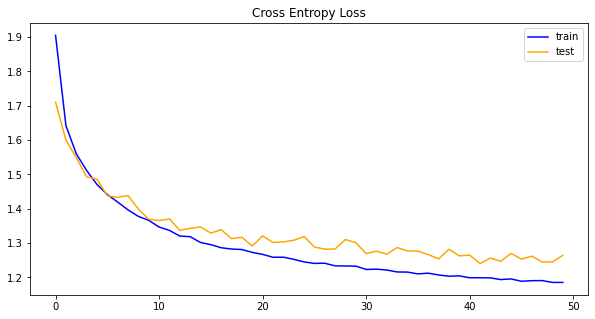

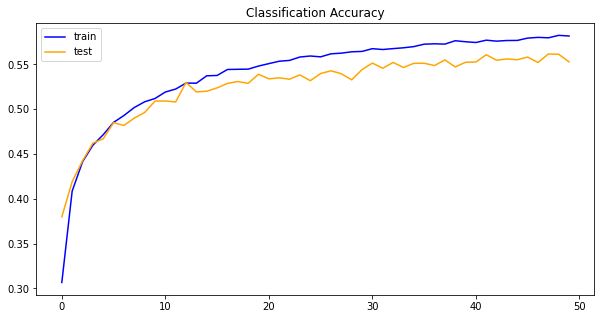

In [ ]:
# evaluate model
_ , acc = model.evaluate(testX, testY)
print(f"Accuracy : {acc}")

# plot results
summarize_result(history= history)

# Modified Book model

In [6]:
def modifed_Book_model(input_shape, num_classes):
    
    model = Sequential()

    # layer 1
    model.add(Conv2D(filters= 64, kernel_size= (9, 9), strides = (1, 1), input_shape = input_shape, activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

    # layer 2
    model.add(Conv2D(filters = 32, kernel_size= (5, 5), strides = (1, 1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

    # layer 3
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))

    return model

In [7]:
# load dataset
trainX, trainY, testX, testY = load_dataset()

In [8]:
# normalization
trainX, testX = normalize(trainX, testX)

In [9]:
model = modified_Book_model(trainX[0].shape, 10)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5

In [10]:
optimizer = SGD(learning_rate = 0.001, momentum = 0.9)
# compile model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# fit model
history = model.fit(trainX, trainY, epochs = 100, batch_size = 32, validation_data = (testX, testY)) 

Epoch 1/100
1563/1563 [==============================] - 22s 8ms/step - loss: 1.9182 - accuracy: 0.3041 - val_loss: 1.7177 - val_accuracy: 0.3990
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5853 - accuracy: 0.4310 - val_loss: 1.4736 - val_accuracy: 0.4699
Epoch 3/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4547 - accuracy: 0.4808 - val_loss: 1.3973 - val_accuracy: 0.4961
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3751 - accuracy: 0.5088 - val_loss: 1.3444 - val_accuracy: 0.5189
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3127 - accuracy: 0.5344 - val_loss: 1.3472 - val_accuracy: 0.5245
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2535 - accuracy: 0.5572 - val_loss: 1.2685 - val_accuracy: 0.5420
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2120 - accuracy: 0.5729 - val_loss: 1.2254 -

313/313 [==============================] - 2s 8ms/step - loss: 1.5246 - accuracy: 0.6341
Accuracy : 0.6341000199317932


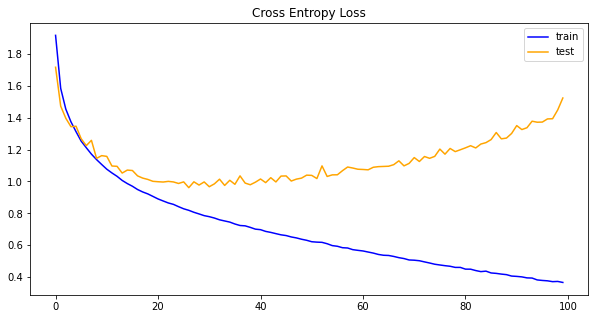

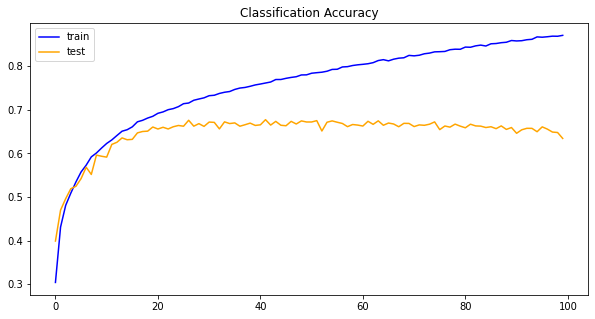

In [12]:
# evaluate model
_ , acc = model.evaluate(testX, testY)
print(f"Accuracy : {acc}")

# plot results
summarize_result(history= history)

# proposed Model
### [link](https://www.kaggle.com/code/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy/notebook#A-Simple-Keras-CNN-trained-on-CIFAR-10-dataset-with-over-88%-accuracy-(Without-Data-Augmentation))

In [20]:
def proposed_model(input_shape, num_classes):
    
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    # num_classes = 10

    return model

In [23]:
model = proposed_model(trainX[0].shape, 10)

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [25]:
optimizer = Adam(learning_rate = 0.001)
# compile modelb
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
# fit model
history = model.fit(trainX, trainY, epochs = 50, batch_size = 32, validation_data = (testX, testY)) 

Epoch 1/50
1563/1563 [==============================] - 38s 23ms/step - loss: 1.6574 - accuracy: 0.4219 - val_loss: 1.4464 - val_accuracy: 0.4822
Epoch 2/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1484 - accuracy: 0.5967 - val_loss: 1.0160 - val_accuracy: 0.6421
Epoch 3/50
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9750 - accuracy: 0.6576 - val_loss: 0.7969 - val_accuracy: 0.7215
Epoch 4/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8739 - accuracy: 0.6980 - val_loss: 0.8079 - val_accuracy: 0.7150
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8091 - accuracy: 0.7197 - val_loss: 0.6619 - val_accuracy: 0.7706
Epoch 6/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7446 - accuracy: 0.7444 - val_loss: 0.6241 - val_accuracy: 0.7832
Epoch 7/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7069 - accuracy: 0.7579 - val_loss: 0.6760 -

313/313 [==============================] - 3s 9ms/step - loss: 0.3780 - accuracy: 0.8769
Accuracy : 0.8769000172615051


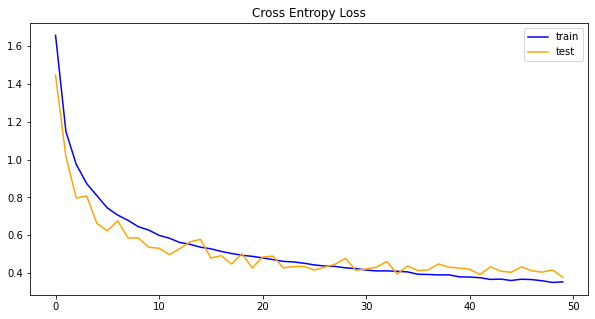

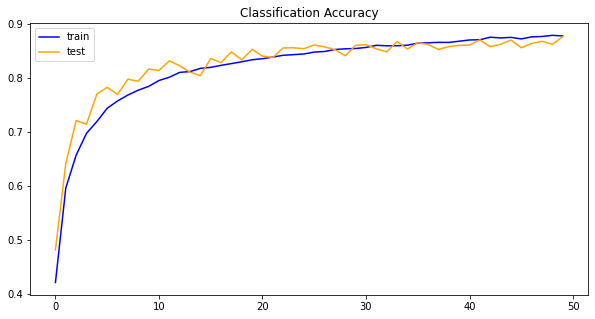

In [27]:
# evaluate model
_ , acc = model.evaluate(testX, testY)
print(f"Accuracy : {acc}")

# plot results
summarize_result(history= history)

In [30]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [36]:
true_labels = np.argmax(testY, axis=1) # Convert one-hot to index
prediction = model.predict(testX)
prediction = np.argmax(prediction, axis=1)

In [39]:
# count instances of each class
class_count = []

for i in range(10):
    tmp = 0
    for j in range(len(true_labels)):
        if (true_labels[j] == i):
            tmp = tmp + 1

    class_count.append(tmp)

In [40]:
class_count

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [41]:
# calculate accuracy for each class
correct_count = np.zeros((10))

for i in range(len(true_labels)):
    if(true_labels[i] == prediction[i]):
        correct_count[true_labels[i]] += 1

In [42]:
correct_count

array([897., 940., 793., 711., 909., 827., 907., 935., 930., 920.])

In [43]:
Accuracy = correct_count / class_count
print(Accuracy)

[0.897 0.94  0.793 0.711 0.909 0.827 0.907 0.935 0.93  0.92 ]


([<matplotlib.axis.XTick at 0x7f9065f0a490>,
 <a list of 10 Text major ticklabel objects>)

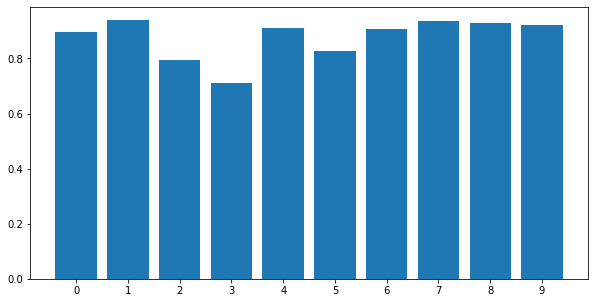

In [47]:
plt.figure(figsize=(10,5))
plt.bar(range(10), Accuracy)
plt.xticks(np.arange(0, 10, 1.0))